In [3]:
# Atentie se va instala cu comanda:  python -m pip install "dask[complete]"  

import dask
import dask.array as da
import dask.dataframe as dd
import dask.delayed as delayed
import dask.bag as bag

import time, sys
import timeit
if sys.version_info[0] >= 3 and sys.version_info[1] >= 3:
    timer = time.perf_counter
else:
    timer = time.clock if sys.platform[:3] == 'win' else time.time
    
scheduler_types = {
    'PROCESSES': 'processes',
    'SINGLE-THREADED': 'single-threaded',
    'THREADS': 'threads'
}

In [2]:
x = da.random.random((10000, 10000))
z = x[::2, 5000:].mean(axis=1)
z

dask.array<mean_agg-aggregate, shape=(5000,), dtype=float64, chunksize=(2048,), chunktype=numpy.ndarray>

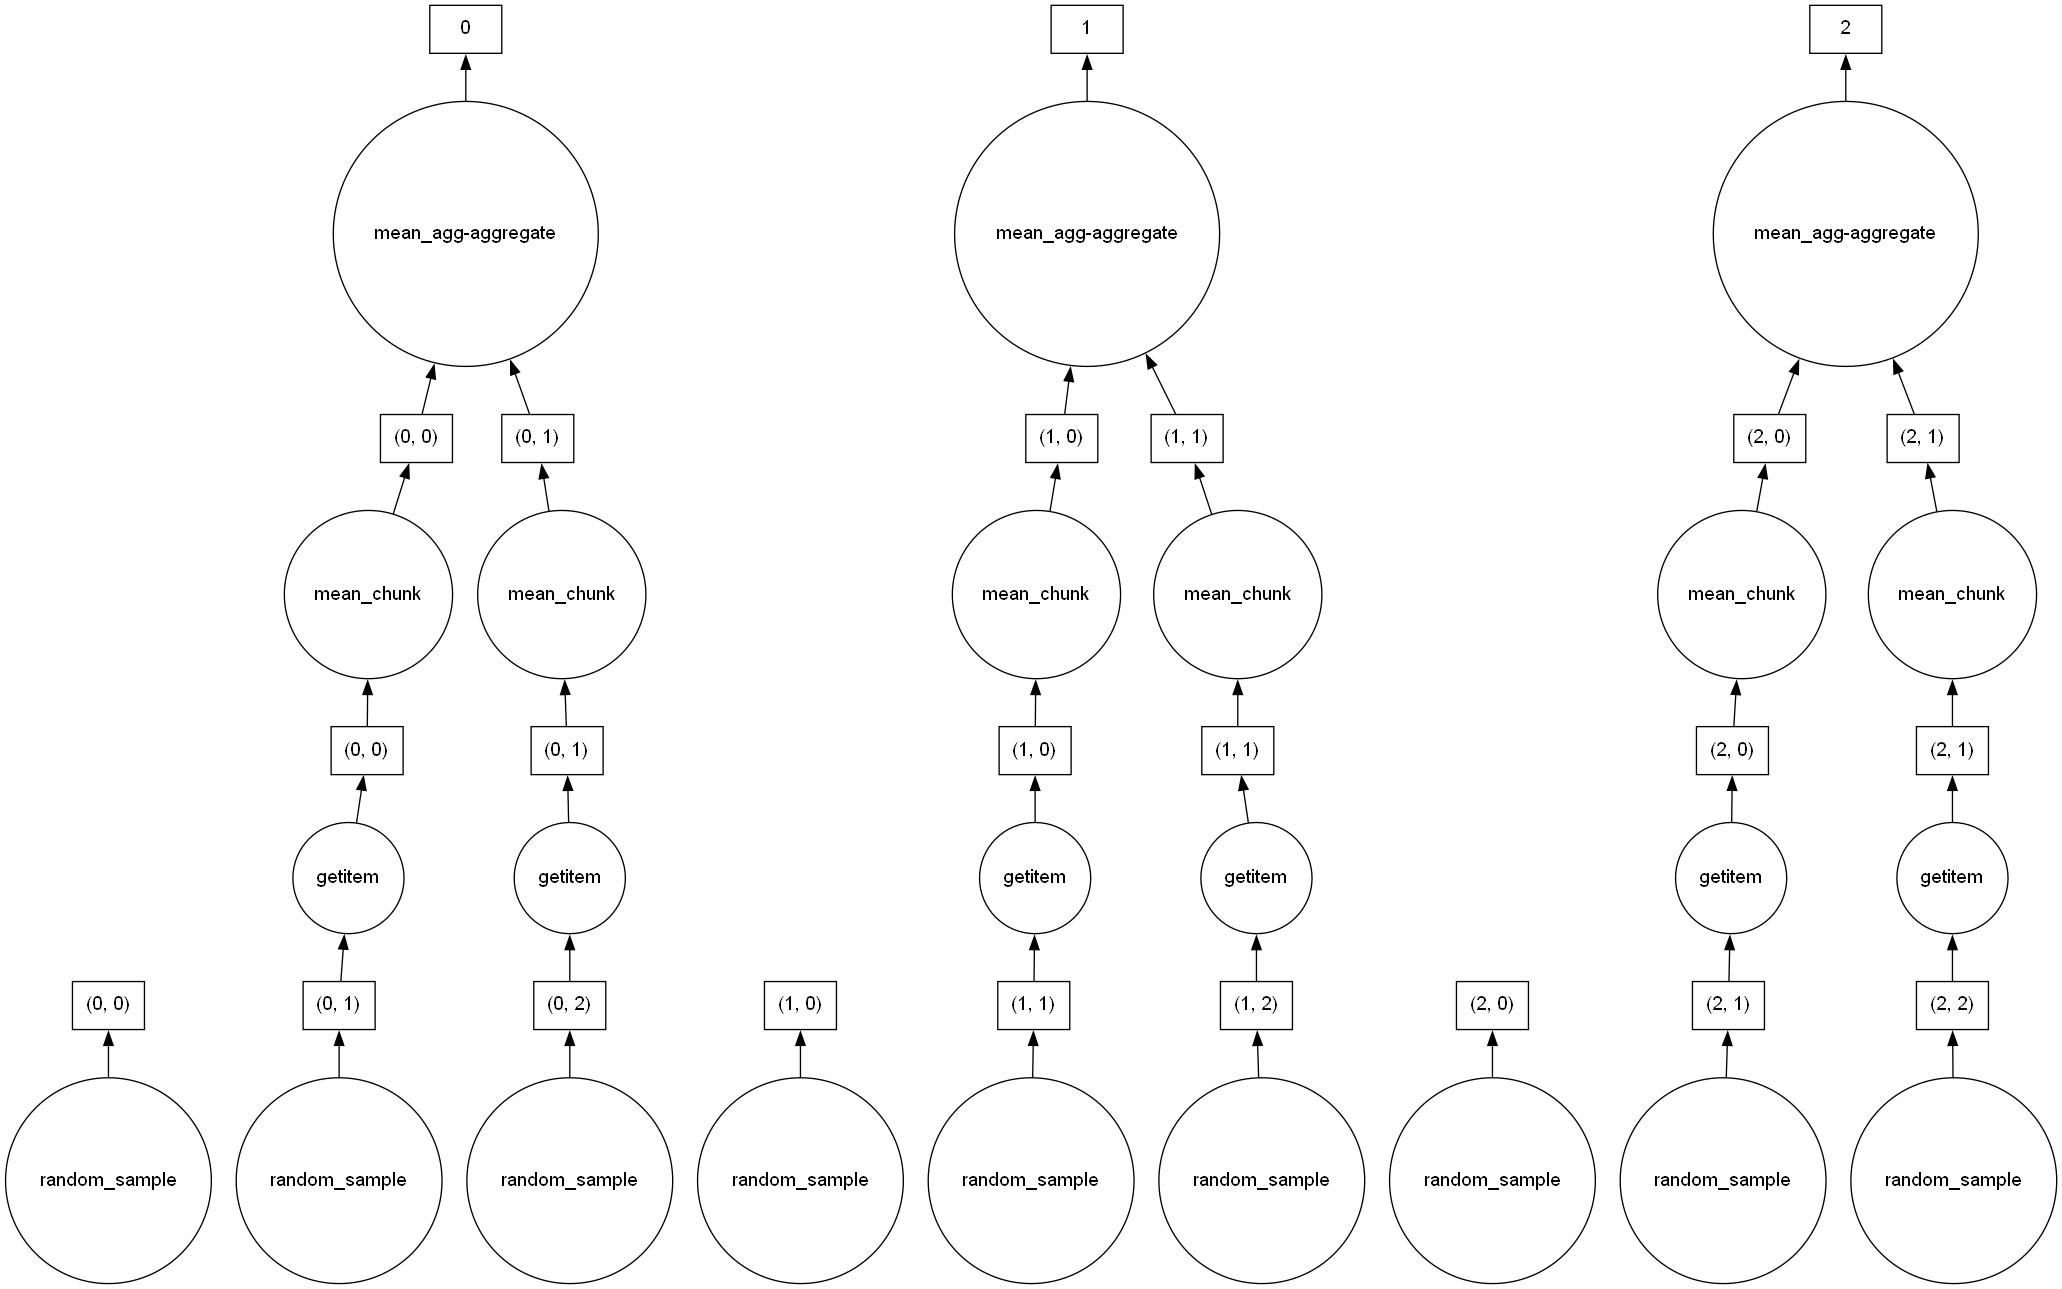

In [3]:
z.visualize()

In [4]:
for key, value in scheduler_types.items():
    print(f'{key} run:')
    %time z.compute(scheduler=value)
    print('----------------------------')

PROCESSES run:
CPU times: total: 93.8 ms
Wall time: 1.74 s
----------------------------
SINGLE-THREADED run:
CPU times: total: 594 ms
Wall time: 655 ms
----------------------------
THREADS run:
CPU times: total: 438 ms
Wall time: 203 ms
----------------------------


In [1]:
import numpy as np
xp = np.random.rand(10000, 10000)
%time zp = xp[::2, 5000:].mean(axis=1)

CPU times: total: 46.9 ms
Wall time: 31.3 ms


In [6]:
x = da.random.random((10000, 10000), chunks=(1000, 1000))
z = x[::2, 5000:].mean(axis=1)
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [7]:
for key, value in scheduler_types.items():
    print(f'{key} run:')
    %time z.compute(scheduler=value)
    print('----------------------------')

PROCESSES run:
CPU times: total: 109 ms
Wall time: 1.68 s
----------------------------
SINGLE-THREADED run:
CPU times: total: 609 ms
Wall time: 674 ms
----------------------------
THREADS run:
CPU times: total: 484 ms
Wall time: 218 ms
----------------------------


In [7]:
x = da.random.random((100000, 100000))
z = x[::2, 5000:].mean(axis=1)
%time z.compute(scheduler='threads')

CPU times: total: 3min 5s
Wall time: 30.8 s


array([0.49969421, 0.50024183, 0.49969319, ..., 0.50070016, 0.49965285,
       0.50018348])

In [8]:
from dask.distributed import Client
client = Client()       #distribuire
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.82 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50707,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.82 GiB
Comm: tcp://127.0.0.1:50731,Total threads: 2
Dashboard: http://127.0.0.1:50736/status,Memory: 3.95 GiB
Nanny: tcp://127.0.0.1:50710,


In [9]:
import dask.array as da
import numpy as np

# in cazul tabloului numpy genereaza eroare de memorie
#xp = np.random.rand(100000, 100000)

#x = da.random.random((100000, 100000), chunks=(1000, 1000))
x = da.random.random((100000, 100000))
z = x[::2, 5000:].mean(axis=1)
%time z.compute()

CPU times: total: 4.27 s
Wall time: 29.6 s


array([0.49892479, 0.50001657, 0.49898529, ..., 0.50059431, 0.50096675,
       0.49974492])

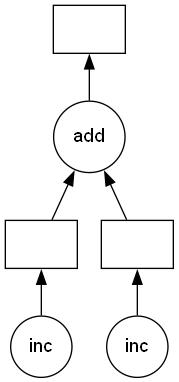

In [11]:
from dask import delayed
from dask.diagnostics import ProgressBar

@delayed
def inc(x):
    return x + 1

@delayed
def add(x, y):
    return x + y
x = inc(15)
y = inc(30)
total = add(x, y)
total.visualize()


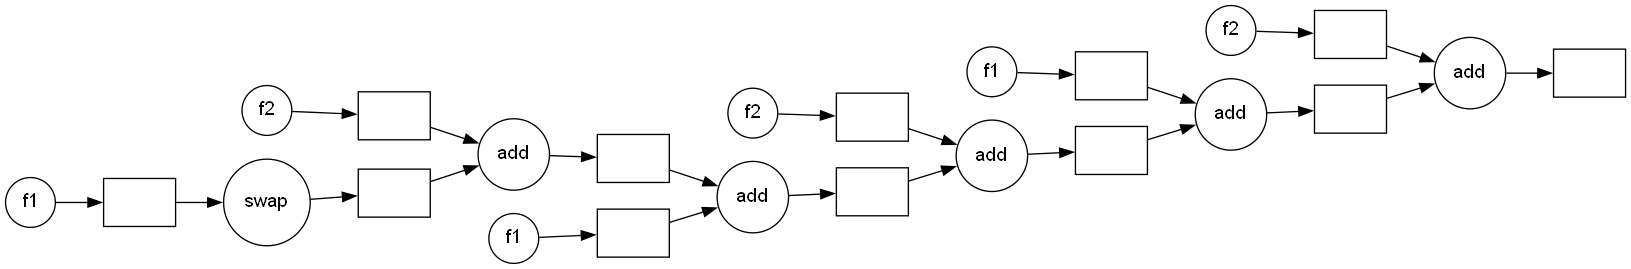

In [12]:
from dask import delayed
data = [1,2,3]
d = 0
@delayed
def f1(x):
    return x + 1
@delayed
def f2(x):
    return 2*x
for x in data:
    a = f1(x)
    b = f2(x)
    d = d+a+b
d.visualize(rankdir='LR')



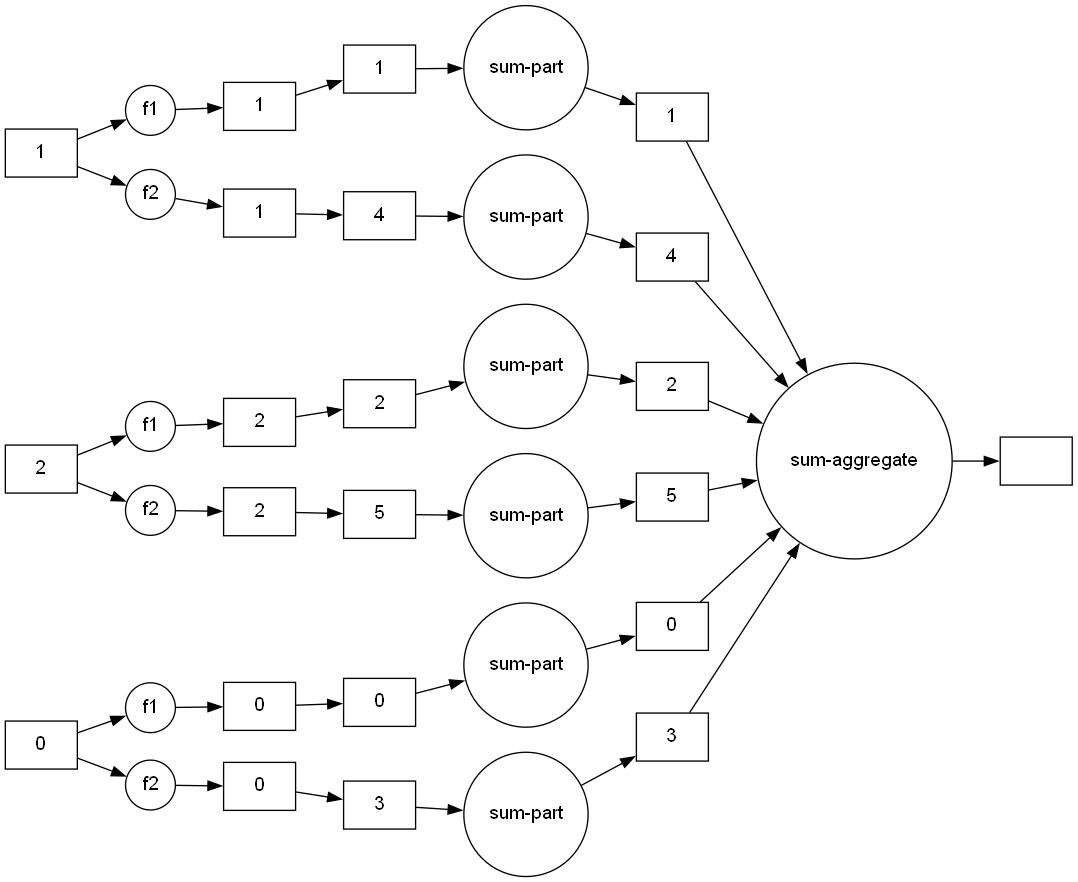

In [13]:
import dask.bag as bag
from operator import add
data = bag.from_sequence([1, 2, 3])
def f1(x):
    return x + 1
def f2(x):
    return 2*x
a = data.map(f1)
b = data.map(f2)
d = bag.concat([a,b])
d = d.sum()
d.visualize(rankdir='LR')

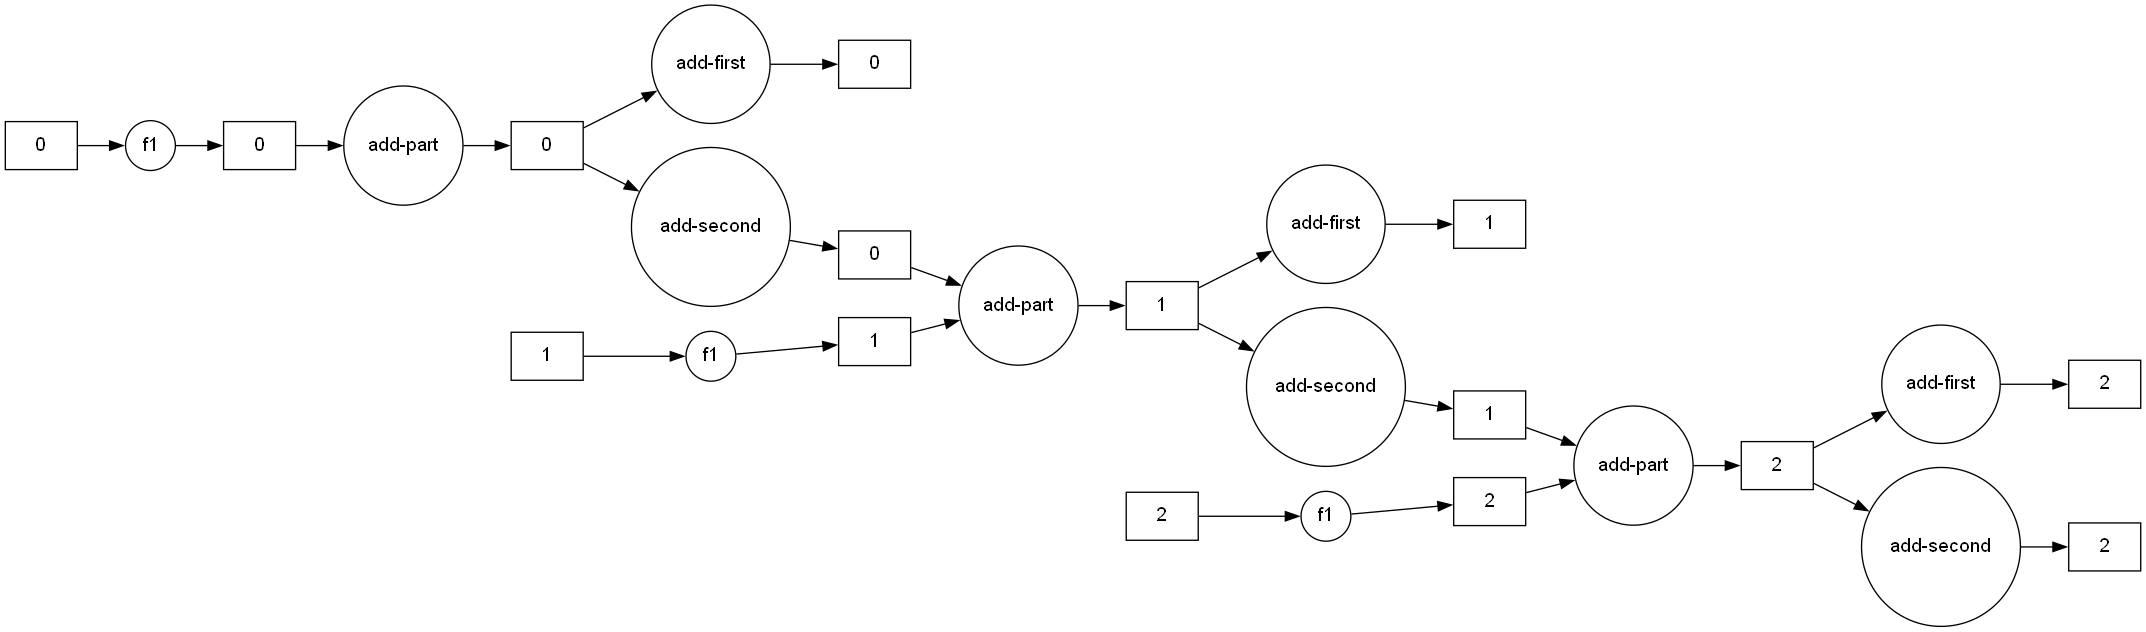

In [14]:
import dask.bag as bag
from operator import add
data = bag.from_sequence([1, 2, 3])
def f1(x):
    return x + 1
def f2(x):
    return 2*x
a = data.map(f1)
b = data.map(f2)
d = a.accumulate(add)
d.visualize(rankdir='LR')

In [10]:
import dask.array as da
from dask.distributed import as_completed

x = da.random.random((1000, 1000))
futures = [client.submit(sum,x) for i in range(5)]
for future in as_completed(futures):  
    %time future.result() 
    print(future.result())


CPU times: total: 15.6 ms
Wall time: 116 ms
dask.array<add, shape=(1000,), dtype=float64, chunksize=(1000,), chunktype=numpy.ndarray>
CPU times: total: 15.6 ms
Wall time: 37.6 ms
dask.array<add, shape=(1000,), dtype=float64, chunksize=(1000,), chunktype=numpy.ndarray>
CPU times: total: 15.6 ms
Wall time: 42.1 ms
dask.array<add, shape=(1000,), dtype=float64, chunksize=(1000,), chunktype=numpy.ndarray>
CPU times: total: 109 ms
Wall time: 167 ms
dask.array<add, shape=(1000,), dtype=float64, chunksize=(1000,), chunktype=numpy.ndarray>
CPU times: total: 15.6 ms
Wall time: 37.9 ms
dask.array<add, shape=(1000,), dtype=float64, chunksize=(1000,), chunktype=numpy.ndarray>


In [16]:
import numpy as np
from dask.distributed import as_completed

x = np.random.rand(10000, 10000)
futures = [client.submit(sum,x) for i in range(10)]
for future in as_completed(futures):  
    %time future.result() 
    #print(future.result()) 


C:\Python\Lib\site-packages\distributed\worker.py:3040: UserWarning: Large object of size 762.94 MiB detected in task graph: 
  (array([[0.0972519 , 0.52044853, 0.71643584, ...,  ... 0.99946481]]),)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  warnings.warn(


CPU times: total: 0 ns
Wall time: 6.56 ms
CPU times: total: 0 ns
Wall time: 3.59 ms
CPU times: total: 0 ns
Wall time: 2.53 ms
CPU times: total: 0 ns
Wall time: 4.04 ms
CPU times: total: 0 ns
Wall time: 4.16 ms
CPU times: total: 0 ns
Wall time: 3.09 ms
CPU times: total: 0 ns
Wall time: 3.02 ms
CPU times: total: 0 ns
Wall time: 3.6 ms
CPU times: total: 0 ns
Wall time: 4.06 ms
CPU times: total: 0 ns
Wall time: 2.52 ms


In [17]:
import numpy as np
from dask.distributed import as_completed

x = np.random.rand(100, 100)
futures = [client.submit(min,x[i,:]) for i in range(5)]
seq = as_completed(futures)
i = 6
for future in seq:  
    %time future.result() 
    print(future.result().mean())
    if (future.result().mean() > 0.01 and i < 10):
        futures_new = [client.submit(min,x[i,:])]
        i = i+1
        seq.update(futures_new)

CPU times: total: 46.9 ms
Wall time: 98.8 ms
0.01932044978049008
CPU times: total: 0 ns
Wall time: 65.3 ms
0.01549686467060496
CPU times: total: 0 ns
Wall time: 6.54 ms
0.017014217324342606
CPU times: total: 0 ns
Wall time: 9.13 ms
0.006522569844830017
CPU times: total: 15.6 ms
Wall time: 4.02 ms
0.0016331140273121436
CPU times: total: 0 ns
Wall time: 0 ns
0.00120218840817643
CPU times: total: 0 ns
Wall time: 5.06 ms
0.004490421129162092
CPU times: total: 0 ns
Wall time: 7.67 ms
0.0026473171882060997


In [11]:
import dask.dataframe as dd
births = dd.read_csv('births.csv', assume_missing=True)
births['decade'] = 10 * (births['year'] // 10)
#births
births.drop(['year', 'month','day'], axis=1)
bornd = births.groupby('decade').births.sum()
bornd
bornd.visualize(rankdir='LR',filename='birthsd.png')
%time bornd.compute()


CPU times: total: 31.2 ms
Wall time: 245 ms


decade
1960.0     3600206.0
1970.0    33384625.0
1980.0    37553803.0
1990.0    39900007.0
2000.0    37335737.0
Name: births, dtype: float64

In [ ]:
client.shutdown()